# Run 1-Bit HHL track simulation toy model with 16 particles and 6 layers 

This Jupyter notebook is compatible with Python 3.13, Qiskit v2.2, Qiskit Aer v0.17, Qiskit runtime version: 0.43 and Qiskit Runtime V2 primitives.
|||
|-|-|
|**Author:** |Alain Chanc√©|
|**Date:** |September 29, 2025|
|**Version:** |**1.00**|
## Credit
This jupyter notebook and the Python file [One_Bit_HHL_Simulation.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/One_Bit_HHL_Simulation.py) are derived from the Jupyter notebook [test.ipynb](https://github.com/GeorgeWilliam1999/LHCb_VeLo_Toy_Model/blob/main/test.ipynb) in the repository [LHCb_VeLo_Toy_Model](https://github.com/GeorgeWilliam1999/LHCb_VeLo_Toy_Model/tree/main) owned by George William Scriven, [GeorgeWilliam1999](https://orcid.org/0009-0004-9997-1647). Relevant documentation can be found in the Jupyter notebook [Tracking Toy Model Demo](https://github.com/Xenofon-Chiotopoulos/Tracking_Toy_model/blob/main/example_notebook.ipynb) in the public repository [Tracking_Toy_model](https://github.com/Xenofon-Chiotopoulos/Tracking_Toy_model/tree/main) owned by Xenofon Chiotopoulos.
# LHCb_VeLo_Toy_Model_1-Bit_HHL
An efficient implementation of the 1-Bit HHL track simulation toy model at the LHCb at CERN derived from the following publications: 
- [Xenofon Chiotopoulos, TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb](https://indico.cern.ch/event/1338689/contributions/6010017/attachments/2951297/5188722/CHEP_ppt.pdf)
- Xenofon Chiotopoulos, Miriam Lucio Martinez, Davide Nicotra, Jacco A. de Vries, Kurt Driessens, Marcel Merk, and Mark H.M. Winands, TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb, EPJ Web of Conferences 337, 01181 (2025), [https://doi.org/10.1051/epjconf/202533701181](https://doi.org/10.1051/epjconf/202533701181).
- [D. Nicotra et al., arXiv:2308.00619v2, 7 Oct 2023, A quantum algorithm for track reconstruction in the LHCb vertex detector](https://arxiv.org/pdf/2308.00619)

## The Large Hadron Collider beauty (LHCb) experiment at CERN
The LHCb Experiment at CERN is a general-purpose detector at the Large Hadron Collider (LHC) and specializes in investigating the slight differences between matter and antimatter by studying a type of particle called the "beauty quark", or "b quark".

It uses a series of subdetectors to detect mainly forward particles ‚Äì those thrown forwards by the collision in one direction. The first subdetector is mounted close to the collision point, with the others following one behind the other over a length of 20 meters.
The 5600-tonne LHCb detector is made up of a forward spectrometer and planar detectors. It is 21 meters long, 10 meters high and 13 meters wide, and sits 100 meters below ground near the town of Ferney-Voltaire, France. 

As of 2024, more than 1600 members from 98 institutes in 22 countries, including 1100 authors.
Source: https://home.cern/science/experiments/lhcb 

## Particle track reconstruction in the LHCb Vertex Locator (VELO)
In the High Luminosity phase of the Large Hadron Collider (HL-LHC), thousands of particles are produced simultaneously. Particles leave energy hits in detector layers. Hits are reconstructed into particle tracks. Tracks reveal Primary Vertices (collision points). Tracks in the LHCb Vertex Locator (VELO) can be modeled as straight lines because it is the sub-detector closest to the LHCb collision point and it contains a negligible magnetic field.

## Minimizing an Ising-like Hamiltonian using matrix inversion
The Hamiltonian $ùêª(ùëÜ)$ is parametrized in terms of doublets $ùëÜ$, these doublets are possible connections between two hits in subsequent detector layers and take a binary value to indicate if they actively contribute to a track, $S_i \in$ {0, 1}. It includes three terms:

- The angular term $ùêª_{ùëéùëõùëî}$ is the most important as it determines if a set of doublets $ùëÜ_ùëñ$ and $ùëÜ_ùëó$ are aligned within $\varepsilon$.
- $ùêª_{spec}(ùëÜ)$ makes the spectrum of $A$ positive.
- $ùêª_{gap}(ùëÜ)$ ensures gap in the solution spectrum.

$$ùêª(ùëÜ) = ùêª_{ùëéùëõùëî}(ùëÜ,\varepsilon)+\gammaùêª_{spec}(ùëÜ)+\deltaùêª_{gap}(ùëÜ)$$

$$H_{\text{ang}}(S,\varepsilon) = -\frac{1}{2} \left[ \sum_{abc} f(\theta_{abc}, \varepsilon) S_{ab} S_{bc} \right]$$

$$ùêª_{spec}(ùëÜ)=\sum_{ùëéùëè} ùëÜ_{ùëéùëè}^2$$

$$ùêª_{gap}(ùëÜ)=\sum_{ùëéùëè} (1‚àí2S_{ùëéùëè})^2)$$

$$
f(\theta_{abc}, \varepsilon) =
\begin{cases}
1 & \text{if } \cos(\theta_{abc}) \geq 1 - \varepsilon \\
0 & \text{otherwise}
\end{cases}
$$

$$ùêª(ùëÜ)=‚àí\frac{1}{2} \left[\sum_{abc} f(\theta_{abc}, \varepsilon) S_{ab} S_{bc} + \gamma\sum_{ùëéùëè} ùëÜ_{ùëéùëè}^2 + \delta\sum_{ùëéùëè} (1‚àí2S_{ùëéùëè} )^2\right]$$ 

By relaxing $ùëÜ_ùëñ\in‚Ñù$, we find its minimum by taking the derivative of the quadratic $ùêª$, obtaining a system of linear equations:

$$ ‚àá_ùëÜ ùêª=‚àíùê¥ùëÜ+ùëè=0,  ùê¥ùëÜ=ùëè$$

Matrix inversion yields the solution of reconstructed tracks. The resulting vector $ùëÜ$ of real values is subsequently discretized to obtain an "on"/"off" status by setting a threshold $ùëá$.

## Solving the system of linear equations classically
The system of linear equations $ùê¥ùëÜ=ùëè$ is solved using [scipy.sparse.linalg.cg](https://docs.scipy.org/doc/scipy-1.12.0/reference/generated/scipy.sparse.linalg.cg.html):
```
sol, _ = sci.sparse.linalg.cg(A, vector_b, atol=0)
```
The discretized solution is obtained by setting a threshold `T_classical` in the list of configuration parameters `param`:
```
T_classical = param["T_classical"]
disc_sol = (sol > T_classical).astype(int)
```

## Solving the system of linear equations with the 1-Bit HHL algorithm
The Harrow‚ÄìHassidim‚ÄìLloyd (HHL) algorithm promises a complexity improvement over the best classical alternatives for solving sparse systems of linear equations. However, its practical implementation faces considerable challenges. The Quantum Phase Estimation (QPE) step results in prohibitively deep circuits, making the algorithm unfeasible on currently available hardware short of fault-tolerant quantum computing.

The 1-Bit HHL algorithm, presented in the paper [TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb](https://doi.org/10.1051/epjconf/202533701181), applies a first-order Suzuki‚ÄìTrotter decomposition to approximate the time-evolution operator. By restricting the QPE accuracy to a single bit, the algorithm can efficiently determine whether a phase is close to zero or significantly different.

The discretized solution is obtained by setting a threshold `T_hhl` in the list of configuration parameters `param`:
```
T_hhl = param["T_hhl"]
disc_x_hhl = (x_hhl > T_hhl).astype(int)
```

## Efficient hybrid 1-Bit HHL - classical implementation 
Our efficient implementation only uses the hits in the first three layers for both classical and 1-Bit HHL simulations. The function `get_tracks_smart()` in the module [One_Bit_HHL_Simulation.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/One_Bit_HHL_Simulation.py) completes the list of active segments with hits in all the outer layers. It uses only active segments that intersect with the z-axis to reconstruct tracks. Their intersection with the z-axis gives a list of found primary vertices.

# Installation

## Requirements
Be sure you have the following installed:

* Qiskit SDK v2.1 or later, with visualization support (`pip install 'qiskit[visualization]'`)
* 'qiskit-aer' library (`pip install qiskit-aer`)
* Qiskit runtime 0.40 or later (`pip install qiskit-ibm-runtime`)

## Clone the repository `LHCb_VeLo_Toy_Model_1-Bit_HHL`
`git clone https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL`

## Contributions by Alain Chanc√©
### [One_Bit_HHL_Simulation.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/One_Bit_HHL_Simulation.py), new functions
- setup_backend() and check_size() derived from class SQD in [SQD_Alain.py](https://github.com/AlainChance/SQD_Alain/blob/main/SQD_Alain.py)
- gen_indices()
- check_intersection()
- intersects_origin()
- intersects_z_axis()
- segment_intersects_z_axis() 
- find_segments() derived from function find_segments() in [simple_hamiltonian.py](https://github.com/GeorgeWilliam1999/LHCb_VeLo_Toy_Model/blob/main/LHCB_Velo_Toy_Models/simple_hamiltonian.py)
- get_tracks_smart() derived from function get_tracks() in [simple_hamiltonian.py](https://github.com/GeorgeWilliam1999/LHCb_VeLo_Toy_Model/blob/main/LHCB_Velo_Toy_Models/simple_hamiltonian.py)
- display_tracks()
- display_p_vertices()
- plot_event()
- classical_simulation()
- HHL_simulation() derived from class SQD in [SQD_Alain.py](https://github.com/AlainChance/SQD_Alain/blob/main/SQD_Alain.py)
- run_simulation()

### [hhl_algorithm_1bit.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/hhl_algorithm_1bit.py), class HHLAlgorithm

#### init()
Modified: 
```
def __init__(self, matrix_A, vector_b, num_time_qubits=5, gain=0.3, lam_s=6, angle_pi=True, max_abs_eigen=4, shots=1024, debug=False, do_draw=False):
```
Added:
```
self.gain = gain
self.lam_s = lam_s
self.angle_pi = angle_pi
self.max_abs_eigen = max_abs_eigen
```
Modified:
```
self.t = np.pi / self.max_abs_eigen
```
Commented out:
```
#self.eigenvalues = np.linalg.eigvals(self.A_orig)
#self.eigenvalues_scaled = np.linalg.eigvals(self.A)
```
#### build_circuit()
Added:
```
lam = round(lam)
```
Modified:
```
gain = self.gain
```
```
if abs(lam) > self.lam_s or abs(lam) < self.lam_s:
  continue
```
### [state_event_model.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/LHCB_Velo_Toy_Models/state_event_model.py), class Segment
Added:
```
def p0(self):
    return [self.hits[0].x, self.hits[0].y, self.hits[0].z]

def p1(self):
    return [self.hits[1].x, self.hits[1].y, self.hits[1].z]
```
## Import libraries

In [1]:
import matplotlib.pyplot as plt

In [2]:
from One_Bit_HHL_Simulation import One_Bit_HHL

Patching HHLAlgorithm with Suzuki-Trotter methods...
Qiskit version: 2.2.2
Qiskit Aer version: 0.17.2
Qiskit runtime version: 0.43.1


## Setup configuration parameters

In [3]:
config = {
    #--------------------
    # Simulation options
    #--------------------
    "dz": 20,                           # layer spacing (mm)
    "layers": 6,                        # Number of layers
    "n_particles": [16],                # Number of particles
    "p_vertices": [(0,0,10)],           # Primary vertices
    "do_draw": False,                   # Whether to draw the HHL circuit
    "measurement_error": 0.0,           # HIT RESOLUTION (sigma on measurement) (sigma)
    "collision_noise": 0.0,             # MULTIPLE SCATTERING (angular noise proxy)
    "ghost_rate": 1e-2,                 # Ghost (fake) track rate
    "drop_rate": 0.0,                   # Hit drop (inefficiency) rate
    "display_tracks": True,             # Whether to display events and ghost tracks
    "T_classical": 0.45,                # Threshold for discretizing classical solutions
    "T_hhl": 0.04,                      # Threshold for discretizing 1-Bit HHL solutions
    "do_spectrum": False,               # Whether to analyze the classical solution spectrum
    "do_print_counts": False,           # Whether to print raw measurement counts
    "resolution": 40,                   # Resolution for plots of tracks - Increase for finer mesh
    "max_abs_eigen": None,              # Compute max_abs_eigen = round(np.max(np.abs(np.linalg.eigvals(A))))
    #------------------------------------------
    # Files containing token (API key) and CRN
    #------------------------------------------
    "token_file": "Token.txt",          # Token file
    "CRN_file": "CRN.txt",              # CRN file
    #-------------
    # Run options
    #-------------
    "backend_name": "fake_torino",      # AerSimulator noiseless or Fake QPU or real IBM cloud backend name
    "run_on_QPU": True,                 # Whether to run the quantum circuit on the target hardware
    "nshots": 100000,                   # Number of shots
    'opt_level':1,                      # Optimization level
    "poll_interval": 5,                 # Poll interval in seconds for job monitor
    "timeout": 600,                     # Time out in seconds for gob monitor
}

## Create an instance of the One_Bit_HHL class from the configuration dictionary

In [4]:
try:
    My_HHL = One_Bit_HHL(**config)
except Exception as e:
   print(f"Error creating 1_Bit_HHL instance: {e}")


Simulation options
layer spacing (mm), dz: 20
layers: 6
n_particles: [16]
primary_vertices: [(0, 0, 10)]
do_draw: False
num_time_qubits: 2
measurement hit resolution: 0.0
multiple scattering collision noise: 0.0
ghost (fake) track rate: 0.01
hit drop (inefficiency) rate: 0.0
display_hits: False
display_tracks: True
plot_tracks: True
T_classical: 0.45
T_hhl: 0.04
do_spectrum: False
do_print_counts: False
resolution: 40
gain: 0.3
lam_s: 6
angle_pi: True
max_abs_eigen: None
Backend name: fake_torino
job_id: d3t0fvk60rgc73aao34g
Run on QPU: True
Number of shots: 100000
Optimization level: 1
Token read from file:  Token.txt
CRN code read from file:  CRN.txt


## Setup events


Initial particle states

Event particles
Type: MIP, Position: (0, 0, 10), Direction: (-0.049556087008112024, 0.1273563478405126), p/q: 0.4590170585792935
Type: MIP, Position: (0, 0, 10), Direction: (0.01184662419832702, 0.062468927331279116), p/q: 0.45570836466683984
Type: MIP, Position: (0, 0, 10), Direction: (-0.15295795800036174, 0.16811303996870747), p/q: 0.4663888925618173
Type: MIP, Position: (0, 0, 10), Direction: (-0.15724556448485327, -0.09461864773498682), p/q: 0.4623849854066034
Type: MIP, Position: (0, 0, 10), Direction: (-0.08922653532182306, 0.14696989152298795), p/q: 0.4614631844729238
Type: MIP, Position: (0, 0, 10), Direction: (-0.006842116823586785, 0.11418058546302425), p/q: 0.45775557200065875
Type: MIP, Position: (0, 0, 10), Direction: (0.12324142561685189, 0.001237732593965391), p/q: 0.45823110738451517
Type: MIP, Position: (0, 0, 10), Direction: (-0.026645563979613967, 0.1257887628386545), p/q: 0.4585340642863964
Type: MIP, Position: (0, 0, 10), Direction: (0.17

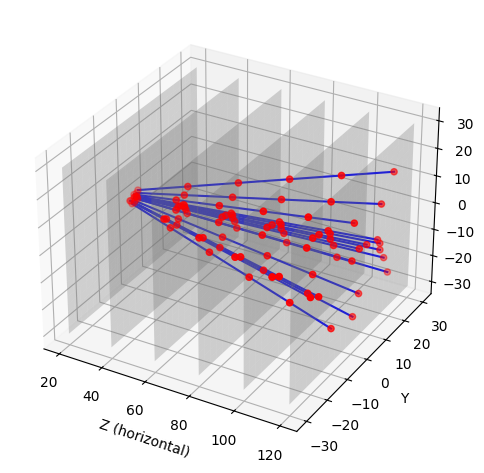


Plotting event tracks with ghost hits (false tracks)


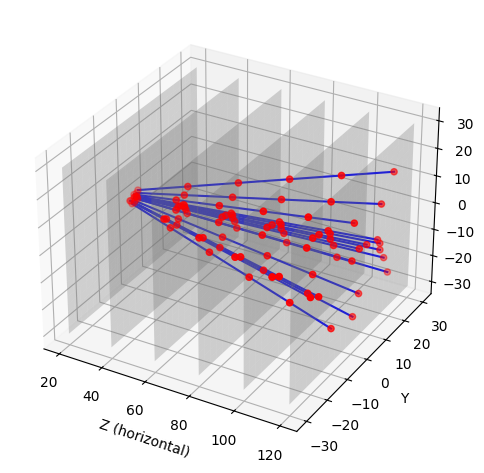

In [5]:
My_HHL.setup_events()

## Setup Hamiltonian

Shape of Hamiltonian matrix A: (512, 512)


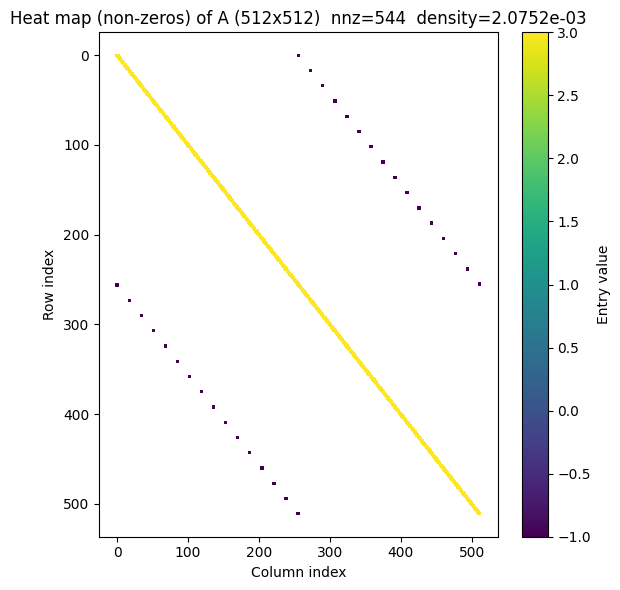

Eigenvalues of Hamiltonian matrix A:
[4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2.
 4. 2. 4. 2. 4. 2. 4. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3

In [6]:
My_HHL.setup_Hamiltonian()

## Run classical and 1-Bit HHL simulations


-----------------------------------------------------------------------------------
 Solving classically with only the first three layers using scipy.sparse.linalg.cg
-----------------------------------------------------------------------------------

Classical solution:
[0.5        0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.5
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.5        0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.5        0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.333333

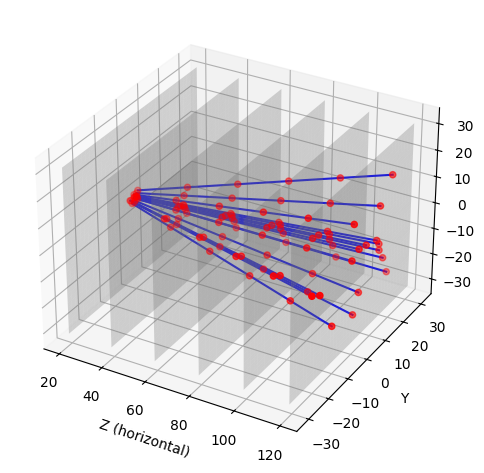


                  EVENT VALIDATION METRICS                  
Total Reconstructed Tracks:                             16
Total Truth Tracks:                                     16
Reconstruction Efficiency:                         100.00%
Ghost Rate:                                          0.00%
Clone Fraction:                           0.00% (0 clones)
Hit Efficiency:                                    100.00%
Purity:                                            100.00%


-------------------------------------------------------
 1-Bit HHL simulation with only the first three layers
-------------------------------------------------------

Computed max_abs_eigen = round(np.max(np.abs(np.linalg.eigvals(A)))): 4

Creating hhl_solver instance of the HHLAlgorithm as follows:
Number of time qubits: 2
lam_s: 6
max_abs_eigen: 4

Number of qubits in HHL circuit:  12
backend_name: fake_torino

Using AerSimulator with method statevector and noise model from fake_torino
Gate counts (w/ pre-init pass

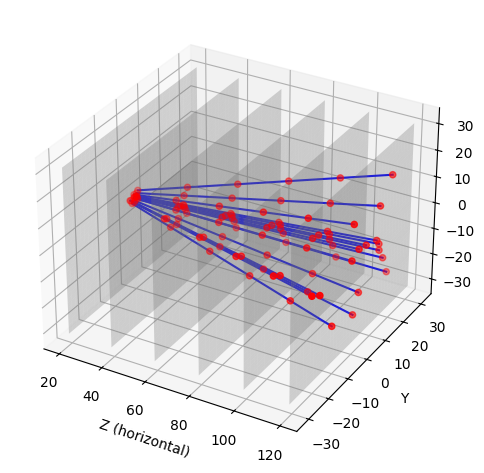

In [7]:
My_HHL.run_simulation()

## References
### The Large Hadron Collider beauty (LHCb) experiment at CERN
- [The Large Hadron Collider beauty (LHCb) experiment](https://home.cern/science/experiments/lhcb)
- [LHCb Taking a closer look at LHC](https://www.lhc-closer.es/taking_a_closer_look_at_lhc/0.lhcb)
- [LHCb @ Syracuse: An overview](https://hep.syr.edu/quark-flavor-physics/lhcb-cern/)
- [LHCb Upgrade II, Detector and Physics Prospects, Vincenzo Vagnoni (INFN Bologna, CERN), for the LHCb collaboration, The 2024 International Workshop on Future Tau Charm Facilities, 15 January 2024](https://indico.pnp.ustc.edu.cn/event/91/contributions/6351/attachments/1859/3063/FTCF%2015%20January%202024.pdf)
### LHCb Velo Toy Model
- [LHCb_VeLo_Toy_Model](https://github.com/GeorgeWilliam1999/LHCb_VeLo_Toy_Model/tree/main)
- [test.ipynb](https://github.com/GeorgeWilliam1999/LHCb_VeLo_Toy_Model/blob/main/test.ipynb)
- [George_Sandbox.ipynb](https://github.com/GeorgeWilliam1999/LHCb_VeLo_Toy_Model/blob/main/George_Sandbox.ipynb)
- [Xenofon Chiotopoulos, TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb](https://indico.cern.ch/event/1338689/contributions/6010017/attachments/2951297/5188722/CHEP_ppt.pdf)
- [Tracking Toy Model Demo](https://github.com/Xenofon-Chiotopoulos/Tracking_Toy_model/blob/main/example_notebook.ipynb)
### Algorithms for Track Reconstruction
- [Xenofon Chiotopoulos, TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb](https://indico.cern.ch/event/1338689/contributions/6010017/attachments/2951297/5188722/CHEP_ppt.pdf)
- [Xenofon Chiotopoulos, Miriam Lucio Martinez, Davide Nicotra, Jacco A. de Vries, Kurt Driessens, Marcel Merk, and Mark H.M. Winands, TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb, EPJ Web of Conferences 337, 01181 (2025)](https://doi.org/10.1051/epjconf/202533701181)
- [Okawa, Hideki, Quantum Algorithms for Track Reconstruction at High Energy Colliders, Workshop of Tracking in Particle Physics Experiments, May 17-19, 2024](https://indico.ihep.ac.cn/event/21775/contributions/155907/attachments/78247/97329/okawa_QTrack_20240517.pdf)
- [Quantum pathways for charged track finding in high-energy collisions, Front. Artif. Intell., 30 May 2024, Sec. Big Data and AI in High Energy Physics, Volume 7 - 2024](https://www.frontiersin.org/journals/artificial-intelligence/articles/10.3389/frai.2024.1339785/full)
- [D. Nicotra et al., arXiv:2308.00619v2, 7 Oct 2023, A quantum algorithm for track reconstruction in the LHCb vertex detector](https://arxiv.org/pdf/2308.00619)
- [Primary Vertex Reconstruction at LHCb, LHCb-PUB-2014-044, October 21, 2014](https://cds.cern.ch/record/1756296/files/LHCb-PUB-2014-044.pdf)
### Harrow‚ÄìHassidim‚ÄìLloyd (HHL) Algorithm
- [V., Shwetha, Abinaya Selvarajan, Aarthi A., and Sneka R.. "Quantum Speedup for Linear Systems: An Analysis of the HHL Algorithm Using IBM Qiskit." Journal of Electronics and Informatics 6, no. 4 (2024): 317-331](https://irojournals.com/iroei/article/view/6/4/3)
- [Solving linear systems of equations using HHL and its Qiskit implementation, Qiskit Tutorial](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-applications/hhl_tutorial.ipynb)
### Quantum Phase Estimation (QPE) Algorithm
- [Stefano Scali, Josh Kirsopp, Antonio M√°rquez Romero, Micha≈Ç Krompiec, Spectral subspace extraction via incoherent quantum phase estimation, 16 Oct 2025, arXiv:2510.14744 quant-ph](
https://doi.org/10.48550/arXiv.2510.14744)
- [Antoine Lemelin, Christophe Pere, Olivier Landon-Cardinal, Camille Coti, Mid-circuit measurement as an algorithmic primitive, 2 Sep 2025, arXiv:2506.00118 quant-ph](
https://doi.org/10.48550/arXiv.2506.00118) 
- [Phase estimation variants and its implication for quantum/classical architecture by Microsoft, From the need to hybridize algorithmically to the need to integrate QPUs with CPUs, J. Mikael, EDF, E. Vergnaud, Teratec TQCI, Conference on QPU/CPU Integration](https://www.teratec.eu/library/seminaires/2022/TQCI/Microsoft_Hybrid_QC_EDF.pdf)
- [quantum-phase-estimation.ipynb, Qiskit Textbook](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-phase-estimation.ipynb)
- [qiskit.circuit.library.phase_estimation](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.phase_estimation)
- [Non-variational and Phase Estimation algorithms, Quantinuum's InQuanto 5.1.0](https://docs.quantinuum.com/inquanto/manual/algorithms/non_variational_overview.html)
### Simulated Bifurcation Algorithm
- [Simulated Bifurcation for Python](https://github.com/bqth29/simulated-bifurcation-algorithm/tree/main)
- [Hideki Okawa, Qing-Guo Zeng, Xian-Zhe Tao, Man-Hong Yung, Quantum-Annealing-Inspired Algorithms for Track Reconstruction at High-Energy Colliders, 30 Aug 2024, 	arXiv:2402.14718 quant-ph](https://doi.org/10.48550/arXiv.2402.14718)
### Quantum Machine Learning in High Energy Physics
- [Wen Guan et al, Quantum machine learning in high energy physics, 2021 Mach. Learn.: Sci. Technol. 2 011003](https://quantum.web.cern.ch/sites/default/files/2021-07/Quantum%20Machine%20Learning%20in%20High%20Energy%20Physics.pdf)
- [Gray HM. Quantum pattern recognition algorithms for charged particle tracking. Philos Trans A Math Phys Eng Sci. 2022 Feb 7;380(2216):20210103. doi: 10.1098/rsta.2021.0103. Epub 2021 Dec 20. PMID: 34923843; PMCID: PMC8685607.](https://pmc.ncbi.nlm.nih.gov/articles/PMC8685607/)
### Hough transform
- [Straight line Hough transform](https://scikit-image.org/docs/stable/auto_examples/edges/plot_line_hough_transform.html)
- [Frank Klefenz, Nico Wittrock, Frank Feldhoff, Parallel Quantum Hough Transform, 15 Nov 2023, arXiv:2311.09002 eess.IV](https://doi.org/10.48550/arXiv.2311.09002)
- [F. Klefenz, K.-H. Noffz, W. Conen, R. Zoz, A. Kugel, and R. Manner. ‚ÄúTrack recognition in 4 ¬µs by a systolic trigger processor using a parallel Hough transform‚Äù. IEEE Transactions on Nuclear Science 40, 688‚Äì691 (1993)](https://ieeexplore.ieee.org/document/256642)
### SQD_Alain
- [SQD_Alain](https://github.com/AlainChance/SQD_Alain)